# Шипилов Станислав Фёдорович
# https://t.me/ShipilovStas
# Проект
# DonorSearch.org: Кластеризация пользователей

**Описание проекта:**

Некоммерческая организация DonorSearch ищет аналитиков. Я помогу этому сервису мотивации доноров стать лучше. Необходимо разделить пользователей на сегменты на основе полученных данных.

Передо мной данные за всю историю существования проекта. Подумав о том, как можно сегментировать зарегистрированных пользователей для дальнейшей работы коллег. Я попробую сформировать сегменты на основе того, как часто доноры делают донации и как быстро они вносят справки об этих донациях в базу. Для этого я проанализирую их таблицы с справками о донациях и общие данные в системе.

С помощью нескольких критериев отбора разделю пользователей на кластеры.

Затем исследую полученные сегменты по различным признакам, визуально оценю их различия.

По итогам исследования необходимо составить содержательный отчёт и создать презентацию.

**Цель исследования:**

Разделить пользователей на кластеры. Предлагаемые кластеры: активный донор, спящий донор, реактивированный донор, потерянный.

**План исследования:**

 * Предобработка данных.
 * Исследовательский анализ данных.
 * Определение оптимального числа кластеров.
 * Разделение пользователей на кластеры.
 * Определение четких правил, как отнести пользователя к тому или иному кластеру.
 * Создание презентации.


**Описание данных**

Датасет `users_anon_data.csv` описывает данные пользователей в системе, его столбцы:

* `ID` — Уникальный идентификатор донора;
* `Пол` — Пол донора;
* `Дата рождения` — Дата рождения донора;
* `Регион` — Регион проживания;
* `Группа крови` — Группа антигенов крови;
* В следующих колонках донор отмечает свою готовность сдавать кровь и/или ее компонент:
  * `Цельная кровь`
  * `Плазма`
  * `Тромбоциты`
  * `Эритроциты`
  * `Лейкоциты`
  * `Костный мозг`
* `Почетный донор` — Дата присвоения донору звания «Почётный донор России»;
* `Отвод от донации` — Отвод от сдачи крови по медицинским причинам;
* В следующих колонках отмечено сдавал ли донор кровь и/или ее компоненты. И сколько раз он это делал:
  * `Цельная кровь`
  * `Плазма`
  * `Тромбоциты`
  * `Эритроциты`
  * `Лейкоциты`
* `Дата регистрации` — Дата регистрации на сайте;
* `Не подтверждённые донации` — Количество донаций донора, о которых он сообщил на момент выгрузки, но не подтвердил справками;
* `Прошедших донаций` — Количество донаций донора, о которых он сообщил на момент выгрузки и подтвердил справками;
* `Донаций до регистрации` — Количество донаций донора, сделанных им до регистрации на сайте и подтвержденных справками;
* `Последняя активность` — Последняя активность на сайте;
* `Теги` — Источник трафика;
* `Указан email ` — После анонимизации - указал ли донор email в анкете;
* `Указан телефон` — После анонимизации - указал ли донор телефон в анкете;
* В следующих колонках отмечено какие соцсети привязал пользователь к профилю:
  * `Авторизация через ВК`;
  * `Авторизация через Одноклассники`;
  * `Авторизация через Твиттер`;
  * `Авторизация через Яндекс`;
  * `Авторизация через Гугл`;
* `Подтверждённые донации` — Дублирует столбец Прошедших донаций;
* `Получен значок 20` — Возможные значения столбца: Да, Нет;
* `Получен значок 75` — Возможные значения столбца: Да, Нет;
* `Получен значок 100` — Возможные значения столбца: Да, Нет;
* `Получен значок 150` — Возможные значения столбца: Да, Нет;
* `Получен значок друг DS` — Возможные значения столбца: Да, Нет;
* `Отправлена футболка` — Возможные значения столбца: Да, Нет;
* `Отправлен браслет` — Возможные значения столбца: Да, Нет;
* `Донаций на момент регистрации` — Дублирует столбец Донаций до регистрации;
* `Количество взятых бонусов ` — сколько бонуов было отправлено пользователю;
* `Донаций с 1 января` — Количество донаций с 1 января текущего года;
* `Донаций на момент регистрации` — Количество бонусов, взятых пользователем за все время существования сайта до момента выгрузки.

Датасет `donations_anon.csv` описывает донации пользователей, его столбцы:

* `ID` — Уникальный идентификатор строки;
* `ID пользователя` — Уникальный идентификатор донора;
* `Класс крови` — Что именно: цельную кровь или компоненты, и какие сдал донор;
* `Дата донации` — Дата донации;
* `Дата планирования` — На какую дату запланирована донация. Проставляется только если пользователь планировал ее на сайте заранее;
* `Тип донации` — Возможны только 2 значения: Платно и Безвозмездно;
* `Город` — Город, где была сделана донация;
* `Регион` — Регион, где была сделана донация;
* `Страна` — Страна, где была сделана донация;
* `Место сдачи` — В каком медицинском учреждении была сделана донация;
* `Есть справка` — Прислал ли пользователь скан/фото справки о донации;
* `Дата добавления донации` — Когда донация была добавлена в базу;
* `Статус донации` — Может принимать одно из пяти значений.

Датасет `donations_plan.csv` описывает данные о запланированных донациях, его столбцы:

* `ID` — Уникальный идентификатор строки;
* `ID пользователя` — Уникальный идентификатор донора;
* `Класс крови` — Что именно - цельную кровь или компоненты и какие - планирует сдать донор;
* `Планируемая дата` — На какую дату запланирована донация / либо когда была сделана донация;
* `Дата планирования` — Дата занесения информации о планировании донации на сайт;
* `Тип донации` — Возможны только 2 значения: Платно и Безвозмездно;
* `Регион` — Место, где планируется сделать донацию в формате: старана, регион, город (возможны исключения в формате, например, для городов федерального значения);
* `Место сдачи` — В каком медицинском учреждении планируют сдать донацию;
* `Статус` — Статус донации. Может принимать одно из четырех значений;
* `Есть справка` — Прислал ли пользователь скан/фото справки о донации;

Датасет `bonuses.csv` описывает данные о доступных бонусах, его столбцы:

* `ID` — Уникальный идентификатор бонуса;
* `Изображение бонуса` — Присутствует ли изображение у бонуса. Возможные значения: "Есть";
* `Изображение партнера` — Присутствует ли изображение у партнера. Возможные значения: "Есть";
* `Опубликован?` — Опубликован ли бонус. Возможные значения: "Да", "Нет";
* `На главной странице?` — Находится ли бонус на главной странице. Возможные значения: "Да", "Нет";
* `Приоритет` — Приоритет бонуса;
* `Взято промокодов` — Количество взятых промокодов;
* `Всего промокодов` — Общее количество промокодов;
* `Срок действия` — Срок действия промокода;
* `Дата добавления` — Дата добавления бонуса;
* `Города ` — Какие города доступны для использования промокода. Возможные значения: "Доступен всем", "Москва".

Датасет `user_bonus_anon.csv` описывает данные о бонусах, отправленных донорам, его столбцы:

* `ID` — пользователя Уникальный идентификатор донора;
* `Количество взятых бонусов` — Количество взятых бонусов;
* `Количество донаций` — Количество донаций;
* `Название партнера` — Название партнера;
* `Бонус` — Бонус;
* `Дата использования` — Дата использования бонуса;
* `Страна` — Страна использования бонуса;
* `Регион` — Регион использования бонуса;
* `Город` — Город использования бонуса.

## Загрузка данных и подготовка к анализу

In [1]:
# Импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, date, timedelta
import numpy as np
import seaborn as sb
from scipy import stats as st

In [2]:
# Открытие данных и разделение колонок, столбцов
users_raw = pd.read_csv('~/work/users_anon_data.csv')
donations_raw = pd.read_csv('~/work/donations_anon.csv')
donations_plan_raw = pd.read_csv('~/work/anon_donations_plan.csv')
bonuses_raw = pd.read_csv('~/work/bonuses_anon.csv')
user_bonus_raw = pd.read_csv('~/work/user_bonus_anon.csv')

In [3]:
# Настройка для отображения всех столбцов датафрейма
pd.set_option('display.max_columns', None)

# Вывод первых строк набора данных методом head()
users_raw.head(5) 

,ID,Пол,Дата рождения,Регион,Группа крови,Kell-фактор,Готов сдавать Цельную кровь,Готов сдавать Плазму,Готов сдавать Тромбоциты,Готов сдавать Эритроциты,Готов сдавать Лейкоциты,Готов сдавать Костный мозг,Почетный донор,Отвод от донации,Цельная кровь,Плазма,Тромбоциты,Эритроциты,Лейкоциты,Дата регистрации,Не подтверждённые донации,Прошедших донаций,Донаций до регистрации,Последняя активность,Теги,Указан email,Указан телефон,Авторизация через ВК,Авторизация через Одноклассники,Авторизация через Твиттер,Авторизация через Яндекс,Авторизация через Гугл,Подтверждённые донации,Получен значок 20,Получен значок 75,Получен значок 100,Получен значок 150,Получен значок друг DS,Отправлена футболка,Отправлен браслет,Донаций с 1 января,Донаций на момент регистрации,Количество взятых бонусов
0,300328,Не указано,Не указано,"Россия, Тверская область, Тверь",Не указано,Не указано,Да,Да,Да,Да,Да,Нет,Дата получения не известна,Нет,0,0,0,0,0,25.08.2024,0,0,0,25.08.2024,[None],да,нет,да,нет,нет,нет,нет,0,нет,нет,нет,нет,нет,нет,нет,0,Не указано,0
1,300327,Мужской,08.12.1971,Не указано,Не указано,Не указано,Да,Да,Да,Да,Да,Нет,Дата получения не известна,Нет,0,0,0,0,0,25.08.2024,0,0,Не указано,Не указано,['CardsMobile'],да,да,нет,нет,нет,нет,нет,0,нет,нет,нет,нет,нет,нет,нет,0,Не указано,0
2,300326,Не указано,Не указано,"Россия, Москва",Не указано,Не указано,Да,Да,Да,Да,Да,Нет,Дата получения не известна,Нет,0,0,0,0,0,25.08.2024,0,0,Не указано,25.08.2024,['Referral'],да,нет,нет,нет,нет,нет,нет,0,нет,нет,нет,нет,нет,нет,нет,0,Не указано,0
3,300325,Не указано,Не указано,Не указано,Не указано,Не указано,Да,Да,Да,Да,Да,Нет,Дата получения не известна,Нет,0,0,0,0,0,25.08.2024,0,0,0,25.08.2024,['Recipient'],да,нет,нет,нет,нет,нет,нет,0,нет,нет,нет,нет,нет,нет,нет,0,Не указано,0
4,300324,Мужской,12.10.1971,Не указано,Не указано,Не указано,Да,Да,Да,Да,Да,Нет,Дата получения не известна,Нет,0,0,0,0,0,25.08.2024,0,0,Не указано,Не указано,['CardsMobile'],да,да,нет,нет,нет,нет,нет,0,нет,нет,нет,нет,нет,нет,нет,0,Не указано,0


In [4]:
# Вывод первых строк набора данных методом head()
donations_raw.head(5)

,ID,ID пользователя,Класс крови,Дата донации,Дата планирования,Тип донации,Город,Регион,Страна,Место сдачи,Есть справка,Дата добавления донации,Статус донации
0,367797,210974,Цельная кровь,22.11.2023,Не указана,Безвозмездно,Оренбург,Оренбургская область,Россия,"ГБУЗ ""Оренбургская областная станция переливан...",Да,25.08.2024,На модерации
1,367796,146460,Плазма,16.08.2024,16.08.2024,Безвозмездно,Рыбинск,Ярославская область,Россия,"ГБУЗ ЯО ""Рыбинская станция переливания крови""",Да,25.08.2024,На модерации
2,367795,292587,Цельная кровь,24.08.2024,24.08.2024,Безвозмездно,Москва,Не указан,Россия,Центр крови им. Гаврилова (центр в Царицыно),Да,25.08.2024,На модерации
3,367794,300322,Цельная кровь,23.08.2024,Не указана,Безвозмездно,Уфа,Башкортостан,Россия,"ГБУЗ ""Республиканская станция переливания крови""",Да,25.08.2024,На модерации
4,367793,300322,Цельная кровь,07.05.2024,Не указана,Безвозмездно,Уфа,Башкортостан,Россия,"ГБУЗ ""Республиканская станция переливания крови""",Да,25.08.2024,На модерации


In [5]:
# Вывод первых строк набора данных методом head()
donations_plan_raw.head(5)

,ID,ID пользователя,Класс крови,Планируемая дата,Дата создания планирования,Тип донации,Регион,Место стадчи,Статус,Есть справка
0,38294,223833,Плазма,16.09.2024,25.08.2024,Безвозмездно,"Россия, Москва","НМИЦ ССХ им. А.Н. Бакулева, ОПК",донация запланирована,Нет
1,38293,300325,Цельная кровь,29.08.2024,25.08.2024,Безвозмездно,"Россия, Санкт-Петербург",Городская станция переливания крови Санкт-Пете...,донация запланирована,Нет
2,38292,300325,Цельная кровь,29.08.2024,25.08.2024,Безвозмездно,"Россия, Воронежская область, Воронеж","ГУЗ ""Воронежская ОКБ №1"", ОПК",планирование отменено,Нет
3,38291,6790,Цельная кровь,23.10.2024,25.08.2024,Безвозмездно,"Россия, Кемеровская область, Кемерово","МУЗ ""ГКБ №3 им. М.А. Подгорбунского"", отделени...",донация запланирована,Нет
4,38290,6790,Цельная кровь,23.10.2024,25.08.2024,Безвозмездно,"Россия, Кемеровская область, Кемерово","МУЗ ""ГКБ №3 им. М.А. Подгорбунского"", отделени...",донация запланирована,Нет


In [6]:
# Вывод первых строк набора данных методом head()
bonuses_raw.head(5)

,ID,Изображение бонуса,Изображение партнера,Опубликован?,На главной странице?,Приоритет,Взято промокодов,Всего промокодов,Срок действия,Дата добавления,Города
0,211,Есть,Есть,Да,Нет,15,0,500,31.12.2025,06.09.2024,Доступен всем
1,210,Есть,Есть,Да,Нет,0,2,52,31.12.2024,03.09.2024,Доступен всем
2,209,Есть,Есть,Да,Нет,0,3,20,31.12.2024,27.08.2024,Доступен всем
3,208,Есть,Есть,Нет,Нет,0,1,25,07.09.2024,14.08.2024,Доступен всем
4,207,Есть,Есть,Нет,Нет,1000,80,102,07.09.2024,14.08.2024,Доступен всем


In [7]:
# Вывод первых строк набора данных методом head()
user_bonus_raw.head(5)

,ID пользователя,Количество взятых бонусов,Количество донаций,Название партнера,ID бонуса,Бонус,Дата использования,Страна,Регион,Город
0,149473,123,61,Доступная юридическая помощь,210,Юридическая консультация для доноров,04.09.2024,Россия,NaN,Санкт-Петербург
1,297691,1,5,Доступная юридическая помощь,210,Юридическая консультация для доноров,03.09.2024,Россия,Ростовская область,Ростов-на-Дону
2,112273,13,10,Атлас,209,Генетический тест от Атлас со скидкой в 25%,05.09.2024,Россия,NaN,Москва
3,224803,2,10,Атлас,209,Генетический тест от Атлас со скидкой в 25%,03.09.2024,_,Луганская область,Луганск
4,149473,123,61,Атлас,209,Генетический тест от Атлас со скидкой в 25%,28.08.2024,Россия,NaN,Санкт-Петербург


### Подготовка данных

<div class="alert"  style="border-radius: 5px; box-shadow: 2px 2px 2px; border: 1px solid ">

Перед началом предобработки, переименуем столбцы во всех датафреймах.

In [8]:
users = users_raw.rename(columns={
    'ID': 'id',
    'Пол': 'gender',
    'Дата рождения': 'birth_date',
    'Регион': 'region',
    'Группа крови': 'blood_type',
    'Kell-фактор': 'kell_factor',
    'Готов сдавать Цельную кровь': 'ready_whole_blood',
    'Готов сдавать Плазму': 'ready_plasma',
    'Готов сдавать Тромбоциты': 'ready_platelets',
    'Готов сдавать Эритроциты': 'ready_erythrocyte',
    'Готов сдавать Лейкоциты': 'ready_leukocyte',
    'Готов сдавать Костный мозг': 'ready_marrow',
    'Почетный донор': 'honorary_donor',
    'Отвод от донации': 'withdrawal_donation',
    'Цельная кровь': 'whole_blood',
    'Плазма': 'plasma',
    'Тромбоциты': 'platelets',
    'Эритроциты': 'erythrocyte',
    'Лейкоциты': 'leukocyte',
    'Дата регистрации': 'registration_date',
    'Не подтверждённые донации': 'unconfirmed_donations',
    'Прошедших донаций': 'confirmed_donations',
    'Донаций до регистрации': 'donations_before',
    'Последняя активность': 'last_activity',
    'Теги': 'tags',
    'Указан email': 'email',
    'Указан телефон': 'phone',
    'Авторизация через ВК': 'login_vk',
    'Авторизация через Одноклассники': 'login_ok',
    'Авторизация через Твиттер': 'login_twitter',
    'Авторизация через Яндекс': 'login_yandex',
    'Авторизация через Гугл': 'login_google',
    'Подтверждённые донации': 'verified_donations',
    'Получен значок 20': 'icon_20',
    'Получен значок 75': 'icon_75',
    'Получен значок 100': 'icon_100',
    'Получен значок 150': 'icon_150',
    'Получен значок друг DS': 'icon_friend',
    'Отправлена футболка': 'sent_shirt',
    'Отправлен браслет': 'sent_bangle',
    'Донаций с 1 января': '1st_jan_donations',
    'Донаций на момент регистрации': 'donations_at_registration',
    'Количество взятых бонусов': 'taken_bonuses'
})

donations = donations_raw.rename(columns={
    'ID': 'id',
    'ID пользователя': 'user_id',
    'Класс крови': 'blood_class',
    'Дата донации': 'date_donation',
    'Дата планирования': 'planning_date',
    'Тип донации': 'type_donation',
    'Город': 'city',
    'Регион': 'region',
    'Страна': 'country',
    'Место стадчи': 'place_donation',
    'Есть справка': 'certificate',
    'Дата добавления донации': 'date_added_donation',
    'Статус донации': 'status_donation'
})

donations_plan = donations_plan_raw.rename(columns={
    'ID': 'id',
    'ID пользователя': 'user_id',
    'Класс крови': 'blood_class',
    'Планируемая дата': 'planned_date',
    'Дата создания планирования': 'planning_date_created',
    'Тип донации': 'type_donation',
    'Регион': 'region',
    'Статус донации': 'status_donation',
    'Есть справка': 'certificate'
})

bonuses = bonuses_raw.rename(columns={
    'ID': 'id',
    'Изображение бонуса': 'image_bonus',
    'Изображение партнера': 'image_partner',
    'Опубликован?': 'posted',
    'На главной странице?': 'main_page',
    'Приоритет': 'priority',
    'Взято промокодов': 'taken_promo',
    'Всего промокодов': 'total_promo',
    'Срок действия': 'duration',
    'Дата добавления': 'added_date',
    'Города': 'cities'
})

user_bonus = user_bonus_raw.rename(columns={
    'ID пользователя': 'user_id',
    'Количество взятых бонусов': 'number_taken_bonuses',
    'Количество донаций': 'number_donations',
    'Название партнера': 'partner_name',
    'ID бонуса': 'bonus_id',
    'Бонус': 'bonus',
    'Дата использования': 'activation_date',
    'Страна': 'country',
    'Регион': 'region',
    'Город': 'city'
})

In [9]:
# Привидение столбцов, содержащих даты, к формату datetime64[ns]

users['birth_date'] = pd.to_datetime(users['birth_date'], format='%d.%m.%Y', errors='coerce')
users['birth_date'] = pd.to_datetime(users['birth_date'], format='%d.%m.%Y')

users['registration_date'] = pd.to_datetime(users['registration_date'], format='%d.%m.%Y', errors='coerce')
users['registration_date'] = pd.to_datetime(users['registration_date'], format='%d.%m.%Y')

users['last_activity'] = pd.to_datetime(users['last_activity'], format='%d.%m.%Y', errors='coerce')
users['last_activity'] = pd.to_datetime(users['last_activity'], format='%d.%m.%Y')

donations['date_donation'] = pd.to_datetime(donations['date_donation'], format='%d.%m.%Y')
donations['date_added_donation'] = pd.to_datetime(donations['date_added_donation'], format='%d.%m.%Y')

### Проверка пропусков и явных дубликатов

In [10]:
# сохранение списка датафреймов во временную переменную для выполнения циклов
temp = [users, donations, donations_plan, bonuses, user_bonus]

In [11]:
# Вывод информации обо всех табицах в цикле
for tdf in temp:
    print(tdf.info())
    print('\033[1m' + 'Количество пропущенных значений в таблице по столбцам:' + '\033[0m')
    print(tdf.isna().sum())
    print('\033[1m' + 'Количество явных дубликатов в таблице:' + '\033[0m')
    print(tdf.duplicated().sum())
    print('-'* 55)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286913 entries, 0 to 286912
Data columns (total 43 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   id                         286913 non-null  int64         
 1   gender                     286913 non-null  object        
 2   birth_date                 107507 non-null  datetime64[ns]
 3   region                     286913 non-null  object        
 4   blood_type                 286913 non-null  object        
 5   kell_factor                286913 non-null  object        
 6   ready_whole_blood          286913 non-null  object        
 7   ready_plasma               286913 non-null  object        
 8   ready_platelets            286913 non-null  object        
 9   ready_erythrocyte          286913 non-null  object        
 10  ready_leukocyte            286913 non-null  object        
 11  ready_marrow               286913 non-null  object  

<div class="alert"  style="border-radius: 5px; box-shadow: 2px 2px 2px; border: 1px solid ">

Во всех датафреймах, кроме последнего, отсутствуют пропуски, что говорит о полноте данных.
    
Изучим пропуски региона в `user_bonus`.


In [12]:
user_bonus[user_bonus['region'].isna() == True].groupby('city')['user_id'].count().sort_values(ascending=False)

city
Москва             5290
Санкт-Петербург    1942
Алма-Ата             14
Тирасполь             4
Ташкент               3
Бишкек                1
Кишинев               1
Name: user_id, dtype: int64

<div class="alert"  style="border-radius: 5px; box-shadow: 2px 2px 2px; border: 1px solid ">

Как видно из результатов, все пропуски в столицах (в том числе и бывших) государств, где названия региона соотвествует названию города. Добавим эти названия.

In [13]:
# добавление названий регионов
user_bonus.loc[user_bonus['city'].
               isin(['Москва', 'Санкт-Петербург', 'Алма-Ата', 'Тирасполь', 
                     'Ташкент', 'Бишкек', 'Кишинев']), 'region'] = user_bonus['city']

# удаление остальных пропусков
user_bonus = user_bonus.dropna()

In [14]:
# Вывод дубликатов для их изучения
donations[donations.duplicated()].head(10)

,id,user_id,blood_class,date_donation,planning_date,type_donation,city,region,country,Место сдачи,certificate,date_added_donation,status_donation
610,367179,253837,Плазма,2024-08-23,23.08.2024,Безвозмездно,Ростов-на-Дону,Ростовская область,Россия,ФГБУЗ «Станция переливания крови ФМБА России в...,Да,2024-08-23,Принята
611,367179,253837,Плазма,2024-08-23,23.08.2024,Безвозмездно,Ростов-на-Дону,Ростовская область,Россия,ФГБУЗ «Станция переливания крови ФМБА России в...,Да,2024-08-23,Принята
741,367052,293824,Цельная кровь,2024-08-22,22.08.2024,Безвозмездно,Симферополь,Крым,Россия,ГБУЗ Республики Крым «Центр крови»,Да,2024-08-23,Принята
742,367052,293824,Цельная кровь,2024-08-22,22.08.2024,Безвозмездно,Симферополь,Крым,Россия,ГБУЗ Республики Крым «Центр крови»,Да,2024-08-23,Принята
1514,366280,139030,Плазма,2023-12-19,19.12.2023,Безвозмездно,Липецк,Липецкая область,Россия,"ГУЗ ""Липецкая областная станция переливания кр...",Да,2024-08-21,Принята
1534,366261,149373,Плазма,2024-08-21,19.08.2024,Безвозмездно,Москва,Не указан,Россия,"ФГБУ НМИЦ Гематологии, (бывш. ГНЦ)",Да,2024-08-21,Принята
2133,365586,190234,Цельная кровь,2024-08-20,14.08.2024,Безвозмездно,Севастополь,Крым,Россия,"ГБУЗ Севастополя ""Центр Крови""",Да,2024-08-20,Принята
2219,365498,279399,Тромбоциты,2024-08-20,20.08.2024,Безвозмездно,Москва,Не указан,Россия,Российская детская клиническая больница (РДКБ)...,Да,2024-08-20,Принята
2456,365258,276973,Цельная кровь,2024-08-20,12.08.2024,Безвозмездно,Балаково,Саратовская область,Россия,Выездная акция,Да,2024-08-20,Принята
2457,365258,276973,Цельная кровь,2024-08-20,12.08.2024,Безвозмездно,Балаково,Саратовская область,Россия,Выездная акция,Да,2024-08-20,Принята


<div class="alert"  style="border-radius: 5px; box-shadow: 2px 2px 2px; border: 1px solid ">

Действительно, видно что это задублированные, иногда по несколько раз строчки, поэтому удаляем их из наших данных.

In [15]:
# Расчёт доли явных дубликатов
print('Доля явных дубликатов:')
print(round(donations.duplicated().
            sum()/len(donations)*100, 1), '%')

Доля явных дубликатов:
0.3 %


In [16]:
# Удаление дубликатов с аргументом keep = 'last'
donations = donations.drop_duplicates(keep='last')

# Проверка явных дубликатов после обработки
print('\033[1m' + 'Количество явных дубликатов в таблице после обработки:' + '\033[0m')
print(donations.duplicated().sum())

Количество явных дубликатов в таблице после обработки:
0


<div class="alert"  style="border-radius: 5px; box-shadow: 2px 2px 2px; border: 1px solid ">

В описании данных указано то, что некоторые столбцы дублируют друг друга. Проверим, так ли это.

In [17]:
users['comparison'] = users['confirmed_donations'] == users['verified_donations']

print(users.groupby('comparison')['id'].nunique())

print('Доля различий', round(len(users[users['comparison'] == False])/len(users)*100, 3), '%')

users['comparison2'] = users['donations_at_registration'] == users['donations_before']

print(users.groupby('comparison2')['id'].nunique()) 

print('Доля различий', round(len(users[users['comparison2'] == False])/len(users)*100, 2), '%')

comparison
False       109
True     286804
Name: id, dtype: int64
Доля различий 0.038 %
comparison2
False      4967
True     281946
Name: id, dtype: int64
Доля различий 1.73 %


<div class="alert"  style="border-radius: 5px; box-shadow: 2px 2px 2px; border: 1px solid ">

Так как для наших задач доля различий невелика - удалим дублирующие столбцы.

In [18]:
users = users.drop(['donations_at_registration', 'verified_donations', 'comparison', 'comparison2'], axis=1)

<div class="alert"  style="border-radius: 5px; box-shadow: 2px 2px 2px; border: 1px solid ">

Из исходного датафрейма были удалены 2 дублирующих столбца 

### Добавление столбца с возрастом

In [19]:
# расчёт возраста
users['age'] = users['birth_date'].apply(lambda x: date.today().year - x.year - ((date.today().month, date.today().day) < (x.month, x.day)))
# приведения к целочисленному типу
users['age'] = users['age'].fillna(0).astype('int64')

<div class="alert"  style="border-radius: 5px; box-shadow: 2px 2px 2px; border: 1px solid ">

На этапе загрузки и предобработки данных были произведёны:

* Переименование всех столбцов всех датасетов в соответствии со стандартом `PEP8`;

* Поиск пропусков в исходных датафреймах. Они были обнаружены в таблице `user_bonus` в столбцах, отвечающих за геоданные: `Страна`, `Регион` и `Город`. Основная их часть была заполнена соответствующими названиями регионов, остальные 18 строк были удалены;

* Проверка явных дубликатов показала их наличие в таблице `donations` в количестве 900 строк, что составило 0.3% от всего датафрейма. Они так же были удалены.

Также была проведена проверка типов данных и привидение к соответвующему типу столбцов, содержащих даты и необходимых для дальнейших исследований.

Дополнительно удалены столбцы, в которых логически дублируется информация и проверка показала различия в 1.73 %, что незначительно для целей проекта.
    
Добавлен столбец с возрастом.

## Исследовательский анализ данных

In [20]:
# Датой анализа задам следующей день после последней добавленной донации
now = donations['date_added_donation'].max() + timedelta(days=1)
print('Момент анализа:', now)

Момент анализа: 2024-08-26 00:00:00


In [21]:
# Вывод информации о датах
print('Дата первой добавленой в базу донации:', donations['date_added_donation'].min())
print('Дата последней добавленой в базу донации:', donations['date_added_donation'].max())
print('Исследуемый период:', (donations['date_added_donation'].max() - donations['date_added_donation'].min()).days, 'дней')

Дата первой добавленой в базу донации: 2020-11-18 00:00:00
Дата последней добавленой в базу донации: 2024-08-25 00:00:00
Исследуемый период: 1376 дней


In [22]:
# Вывод числа уникальных доноров в представленных данных, имеющих хотя бы одну подтверждённую донацию
print('Количество уникальных доноров, совершивших хотя бы 1 донацию:', (users['confirmed_donations'] > 0).sum()) 

Количество уникальных доноров, совершивших хотя бы 1 донацию: 44197


### Соотношение пользователей по полу

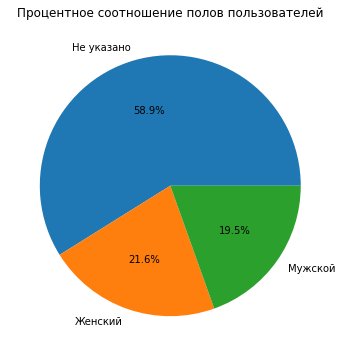

In [23]:
# Группировка пользователей по полу
users.groupby('gender')['id'].nunique().sort_values(ascending=False)

# Вывод круговой диаграммы соотношения полов пользователей
users.groupby('gender')['id'].nunique().sort_values(ascending=False).plot(
    kind = 'pie', 
    y = 'ratio',
    autopct = '%0.1f%%', 
    figsize=(10,6),
    ylabel='',
    title = 'Процентное соотношение полов пользователей')
plt.show()

<div class="alert"  style="border-radius: 5px; box-shadow: 2px 2px 2px; border: 1px solid ">

Как видно из круговой диаграммы, большая часть зарегистрировавшихся пользователей не указали свой пол - 58.9 %.
    
А среди указавших свой пол больше женщин на 2.1%.

### Соотношение пользователей по группам крови

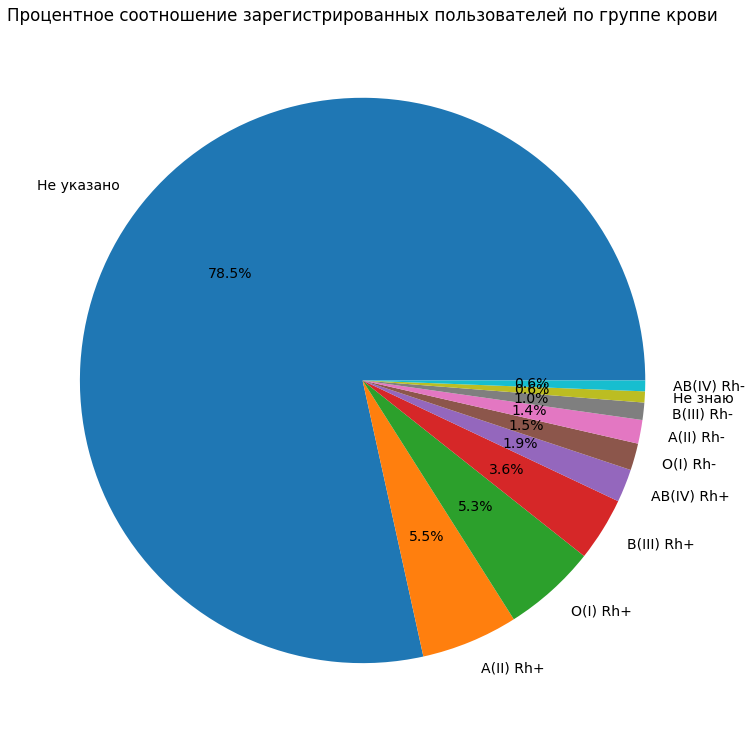

In [24]:
# Группировка и вывод круговой диаграммы соотношения пользователей по группе крови
plt.rcParams.update({'font.size': 14})
users.groupby('blood_type')['id'].nunique().sort_values(ascending=False).plot(
    kind = 'pie', 
    y = 'ratio',
    autopct = '%0.1f%%', 
    figsize=(13,13),
    ylabel='',
    title = 'Процентное соотношение зарегистрированных пользователей по группе крови')
plt.show()

<div class="alert"  style="border-radius: 5px; box-shadow: 2px 2px 2px; border: 1px solid ">

Больше 2/3 всех зарегистрированных пользователей не указали свою группу крови - 78.5 %.
    
Меньше 1 процента не знают свою группу крови - 0.6 %.
    
Самая распространенная группа крови среди указавших её - вторая положительная. Её доля составляет 5.5 %.
    
Самая редкая - четвёртая отрицательная. Всего 0.6 % являются её обладателями.

### Изучение статусов донаций

Частота событий в логах:


,status_donation,total_events
4,Принята,325227
0,Без справки,21020
5,Удалена,7470
3,Отклонена,2067
1,На модерации,145
2,На модерации после принятия,5


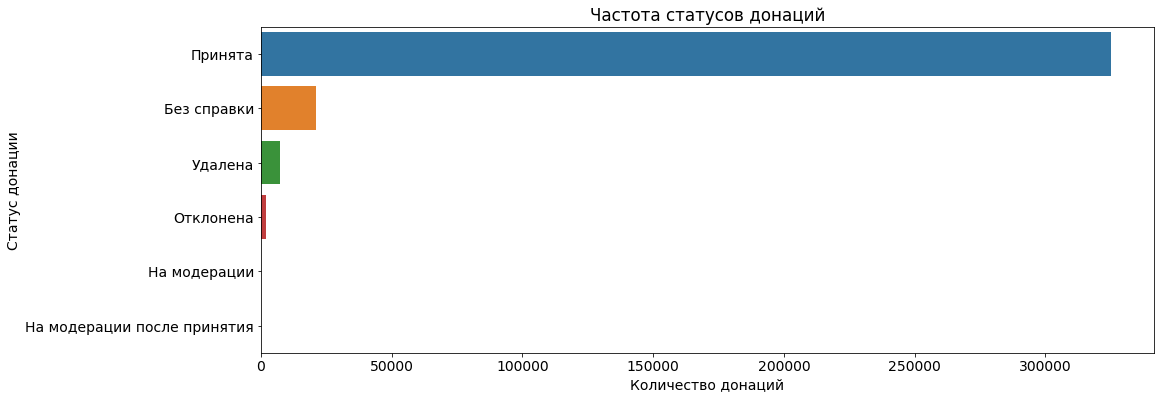

In [25]:
# группировка донаций по статусам
status_donations = (donations.
          groupby('status_donation', as_index=False).
          agg({'id': 'count'}).
          rename(columns={'id' : 'total_events'}).
          sort_values(by='total_events', ascending=False))

print('Частота событий в логах:')
display(status_donations)

# построение графика
plt.figure(figsize=(16, 6))

ax = sb.color_palette("turbo", as_cmap=True)
ax = sb.barplot(x='total_events', y='status_donation', data=status_donations)

ax.set_title('Частота статусов донаций')
ax.set_xlabel('Количество донаций') 
ax.set_ylabel('Статус донации') 
plt.show()

<div class="alert"  style="border-radius: 5px; box-shadow: 2px 2px 2px; border: 1px solid ">

Так как целевым действием для нас является подтверждённая донация, то все статусы, кроме `Принята` и `Без справки` необходимо удалить.

In [26]:
# удаление ненужных статусов и сброс индексов датафрейма
donations = donations[donations['status_donation'].isin(['Принята', 'Без справки'])]
donations.reset_index(drop=True, inplace=True)

### Типы донаций

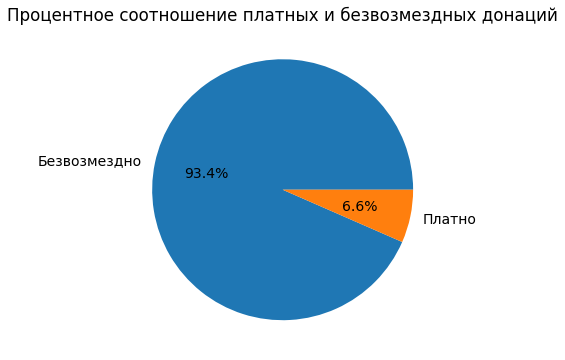

In [27]:
# группировка донаций по типу
donations.groupby('type_donation')['id'].nunique().sort_values(ascending=False)

# Вывод круговой диаграммы соотношения платных и безвозмездных донаций
donations.groupby('type_donation')['id'].nunique().sort_values(ascending=False).plot(
    kind = 'pie', 
    y = 'ratio',
    autopct = '%0.1f%%', 
    figsize=(10,6),
    ylabel='',
    title = 'Процентное соотношение платных и безвозмездных донаций')
plt.show()

<div class="alert"  style="border-radius: 5px; box-shadow: 2px 2px 2px; border: 1px solid ">

На основании круговой диаграммы можно сделать вывод о том, что подавляющее большинство пользователей сервиса сдают кровь и её компоненты безвозмездно - 93.4 %.

### Донации по классам крови

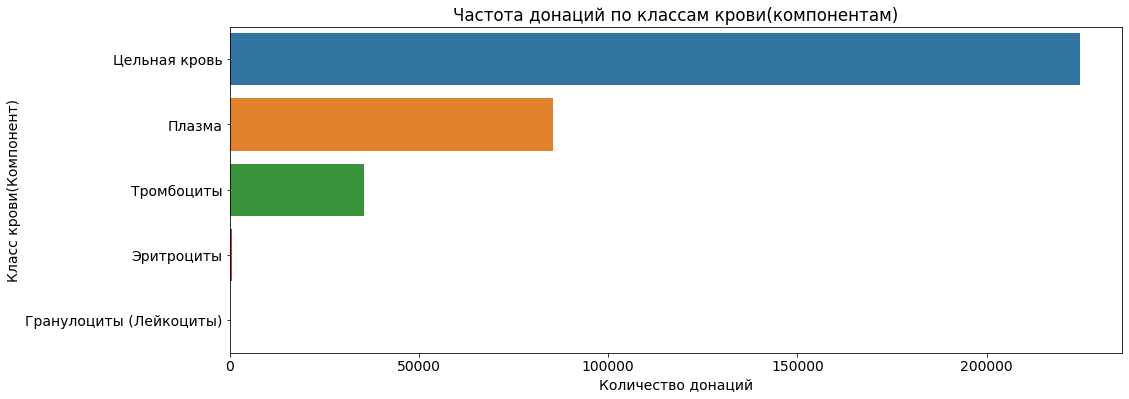

In [28]:
# группировка донаций по классу крови (компоненту)
blood_classes = (donations.
          groupby('blood_class', as_index=False).
          agg({'id': 'count'}).
          rename(columns={'id' : 'total_events'}).
          sort_values(by='total_events', ascending=False))

# построение графика
plt.figure(figsize=(16, 6))

ax = sb.color_palette("turbo", as_cmap=True)
ax = sb.barplot(x='total_events', y='blood_class', data=blood_classes)

ax.set_title('Частота донаций по классам крови(компонентам)')
ax.set_xlabel('Количество донаций') 
ax.set_ylabel('Класс крови(Компонент)') 
plt.show()

<div class="alert"  style="border-radius: 5px; box-shadow: 2px 2px 2px; border: 1px solid ">

Самым редким компонентом для донации являются `Лейкоциты`.
    
На предпоследнем месте `Эритроциты`.
    
`Цельная кровь`, как и ожидалось, находится на первом месте.

### Распределение донаций по месяцам

<div class="alert"  style="border-radius: 5px; box-shadow: 2px 2px 2px; border: 1px solid ">

Для выявления закономерностей возьмём на рассмотрение период в 1 год с момента анализа.

Среднее количество донаций за прошедший год: 3550


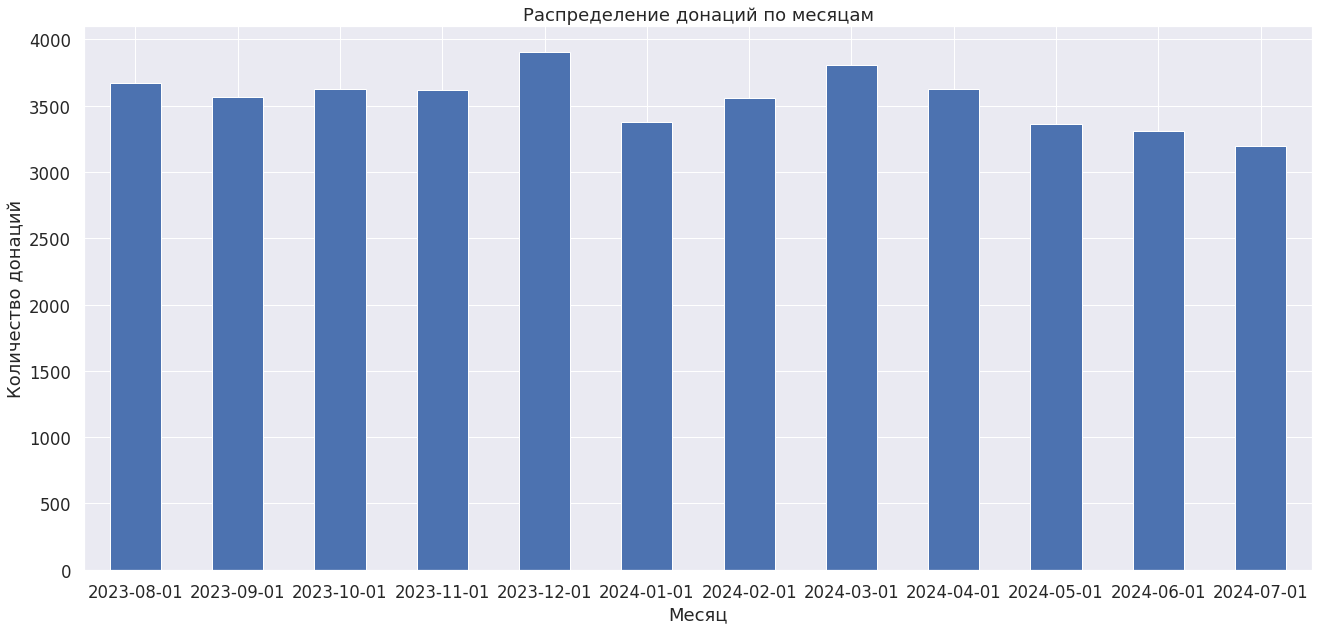

date_donation
2023-08-01    3671
2023-09-01    3562
2023-10-01    3627
2023-11-01    3615
2023-12-01    3903
2024-01-01    3378
2024-02-01    3560
2024-03-01    3803
2024-04-01    3622
2024-05-01    3358
2024-06-01    3311
2024-07-01    3195
Name: date_donation, dtype: int64

In [29]:
# Фильтрация донаций, совершённых за последний год (не считая незакончившийся август) и округление до месяца
dates_donations = (
    donations[(donations['date_donation'] >= np.datetime64('2023-08-01')) &
              (donations['date_donation'] < np.datetime64('2024-08-01'))]['date_donation']
              .astype('datetime64[M]').dt.date)


# Группировка донаций за последний год по месяцам
dates_donations = dates_donations.groupby(dates_donations).count()

print('Среднее количество донаций за прошедший год:', round(dates_donations.mean()))

# Построение графика
with plt.style.context('seaborn'):
    sb.set(font_scale=1.5)
    dates_donations.plot.bar(x=dates_donations.index, y=dates_donations, grid=True, figsize=(22,10), 
                   title = 'Распределение донаций по месяцам',
                   xlabel='Месяц', ylabel = 'Количество донаций')
    plt.xticks(rotation=0)
    plt.show()
    
dates_donations

<div class="alert"  style="border-radius: 5px; box-shadow: 2px 2px 2px; border: 1px solid ">

В среднем за год доноры совершали 3550 донаций в месяц.
    
За год наблюдаются пики в декабре и марте, а после марта текущего года идёт постепенное снижение количества донаций до минимального значения в июле.

### Топ-10 доноров

user_id
235391    378
248492    312
152055    301
299142    287
273317    269
201521    253
281894    249
211970    236
216353    233
53912     232
Name: id, dtype: int64


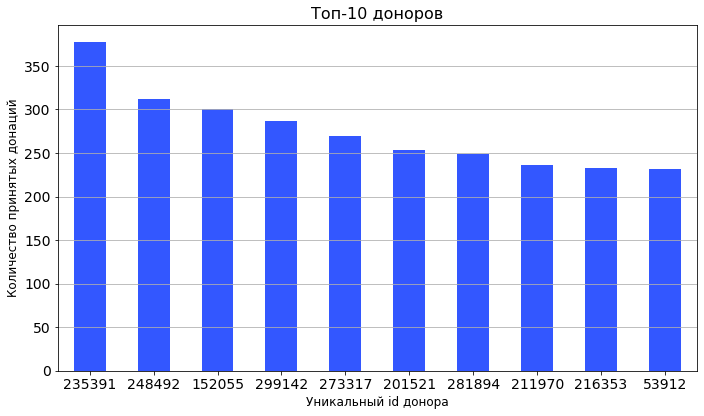

In [30]:
# топ-10 доноров за исследуемый период
top_10 = donations.groupby('user_id')['id'].count().sort_values(ascending=False).head(10)

print(top_10)

# Построение графика
fig, ax = plt.subplots(figsize=(10, 6))
top_10.plot(kind='bar', color='#3357FF', ax=ax)
ax.grid(axis = 'y')

plt.title('Топ-10 доноров', fontsize=16)
plt.xlabel('Уникальный id донора', fontsize=12)
plt.ylabel('Количество принятых донаций', fontsize=12)
plt.xticks(rotation=0)

plt.tight_layout() 
plt.show()

<div class="alert"  style="border-radius: 5px; box-shadow: 2px 2px 2px; border: 1px solid ">

На первом месте пользователь с уникальным id `235391`, он совершил 378 донаций, опередив ближайшего конкурента на 66 донаций и может считаться лучшим донором сервиса.

Замыкает группу лидеров доноры, имеющие подтверженные справками сдачи крови и её компонентов, в количестве 236, 233 и 232 соответственно.

### Топ-5 источников трафика

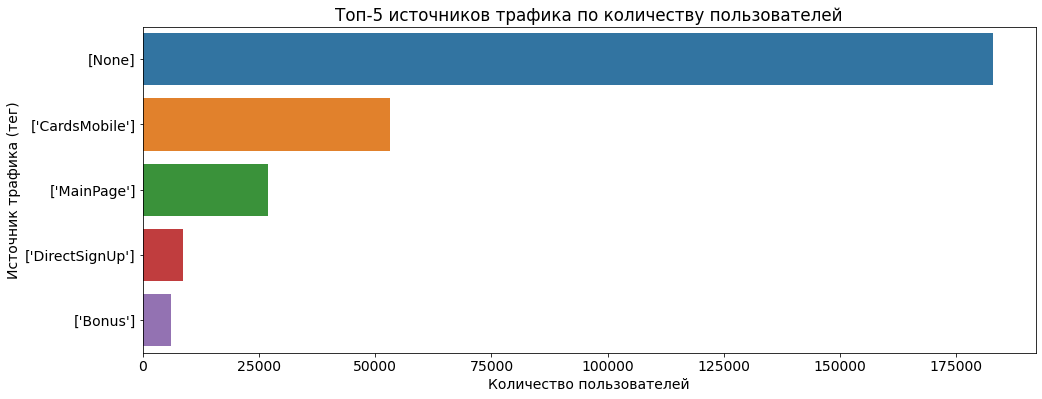

,tags,total_tags
22,[None],182916
5,['CardsMobile'],53275
12,['MainPage'],26892
6,['DirectSignUp'],8573
4,['Bonus'],6096


In [31]:
# группировка пользователей по источнику трафика
tags_grouped = (users.
          groupby('tags', as_index=False).
          agg({'id': 'count'}).
          rename(columns={'id' : 'total_tags'}).
          sort_values(by='total_tags', ascending=False).
           head(5))

# построение графика
plt.figure(figsize=(16, 6))

ax = sb.color_palette("turbo", as_cmap=True)
ax = sb.barplot(x='total_tags', y='tags', data=tags_grouped)

ax.set_title('Топ-5 источников трафика по количеству пользователей')
ax.set_xlabel('Количество пользователей') 
ax.set_ylabel('Источник трафика (тег)') 
plt.show()

tags_grouped

<div class="alert"  style="border-radius: 5px; box-shadow: 2px 2px 2px; border: 1px solid ">

У большей части зарегистрированных пользователей не указан источник трафика - 182 916 регистраций.
    
Самым частым является `[CardsMobile]` - 53 275 регистраций.
    
Пятёрку замыкает `[Bonus]` с результатом в 6 096.

<div class="alert"  style="border-radius: 5px; box-shadow: 2px 2px 2px; border: 1px solid ">

Исходя из полученных результатов, можно сделать следующие выводы:
* 44197 уникальных пользователей из датасета сделали хотя бы 1 подтверждённую донацию;
* Больше половины не указали свой пол;
* 78.5 % зарегистрированных пользователей не указали свою группу крови;
* Самая редкая группа крови в представленных данных - Четвёртая отрицательная `AB(IV) Rh-`, а самая распространённая - Вторая положительная `A(II) Rh+`;
* 93.4 % людей сдавали кровь безвозмездно;
* В этом календарном году больше всего раз сдавали кровь в марте. В среднем за прошедший год (365 дней) было 3550 донации в месяц;
* Больше всех донаций совершил пользователь с уникальным id `235391` - 378;
* Самым частым источником трафика является `[CardsMobile]` - 53 275 регистраций.
    

## Сегментация

<div class="alert"  style="border-radius: 5px; box-shadow: 2px 2px 2px; border: 1px solid ">

Для сегментации было выбрано 5 групп пользователей:
1. Потенциальные доноры;
2. Потерянные доноры;
3. Спящие доноры;
4. Активные доноры;   
5. Лояльные доноры;
    
Для разделения пользователей на перечисленные выше группы, я возьму 4 основных критерия отбора:
1. Количество подтверждённых донаций;
2. Была ли подтверждённая донация за последние 3 года;
3. Была ли подтверждённая донация за последний год;
4. Количество быстрых добавлений (добавление справки о донации в течении трёх дней после сдачи крови).

### Создание общей таблицы

In [32]:
# создание общей таблицы с необходимым для сегментации данными
summary_table = pd.DataFrame()
summary_table['id'] = users['id']
summary_table['confirmed_donations'] = users['confirmed_donations']

# создание series с последними датами донаций каждого пользователя
last_donation = donations.groupby('user_id')['date_donation'].max()

# создание словаря из Series
s_dict = last_donation.to_dict()

# применение map и условное присваивание
summary_table.loc[:, 'last_donation'] = summary_table['id'].map(s_dict)

summary_table.loc[:, 'donated_3_years'] = (np.where(summary_table['last_donation']
                                            .apply(lambda x: (now - x).days) < 1095, 'Да', 'Нет'))

summary_table.loc[:, 'donated_1_year'] = (np.where(summary_table['last_donation']
                                            .apply(lambda x: (now - x).days) < 365, 'Да', 'Нет'))

In [33]:
# создание series с количеством быстрых добавлений спраков о донации
filtered_users = (donations[(donations['date_added_donation'] - donations['date_donation']) <= timedelta(days=3)]
                  .groupby('user_id')['id'].count())

# создание словаря из Series
s_dict2 = filtered_users.to_dict()

# применение map и условное присваивание
summary_table.loc[:, 'quick_addition'] = summary_table['id'].map(s_dict2)

summary_table['quick_addition'] = pd.to_numeric(summary_table['quick_addition'], errors='coerce').fillna(0)

summary_table['quick_addition'] = summary_table['quick_addition'].astype('int64')

summary_table.head(10)

,id,confirmed_donations,last_donation,donated_3_years,donated_1_year,quick_addition
0,300328,0,NaT,Нет,Нет,0
1,300327,0,NaT,Нет,Нет,0
2,300326,0,NaT,Нет,Нет,0
3,300325,0,NaT,Нет,Нет,0
4,300324,0,NaT,Нет,Нет,0
5,300323,0,NaT,Нет,Нет,0
6,300322,0,2024-08-23,Да,Да,1
7,300321,0,NaT,Нет,Нет,0
8,300320,0,NaT,Нет,Нет,0
9,300319,0,NaT,Нет,Нет,0


### Обозначение условий

In [34]:
# обозначение условий для сегментации пользователей
conditions = [
    (summary_table['confirmed_donations'] == 0), # в первую группу `Потенциальные доноры` попадают 
# зарегистрированные пользователи без подтверждённых донаций
    (summary_table['donated_3_years'] == 'Нет'), # во вторую группу `Потерянные доноры` попадают 
# доноры, не подтвердившие ни одной донации за последние 3 года
    (summary_table['donated_1_year'] == 'Нет'), # в третью группу `Спящие доноры` попадают 
# доноры, не подтвердившие ни одной донации за последний год
    (summary_table['quick_addition'] < 3), # в четвёртую группу `Активные доноры` попадают 
# доноры, имеющие меньше 3 быстрых добавлений
    (summary_table['donated_1_year'] == 'Да') & (summary_table['quick_addition'] >= 3) # в последнюю группу
# `Активные доноры` попадают доноры, имеющие подтверждённую донацию за последний год и 3 или больше быстрых 
# добавления
]

# создание списка с названиями групп
choices = ['Потенциальные доноры', 'Потерянные доноры', 'Спящие доноры', 'Активные доноры', 'Лояльные доноры']

# распределение пользователей на группы и создание нового столбца
users['segment'] = np.select(conditions, choices, default='Другие')

#вывод результата распределения
users['segment'].value_counts()

Потенциальные доноры    242716
Потерянные доноры        20269
Спящие доноры            11153
Активные доноры           9069
Лояльные доноры           3706
Name: segment, dtype: int64

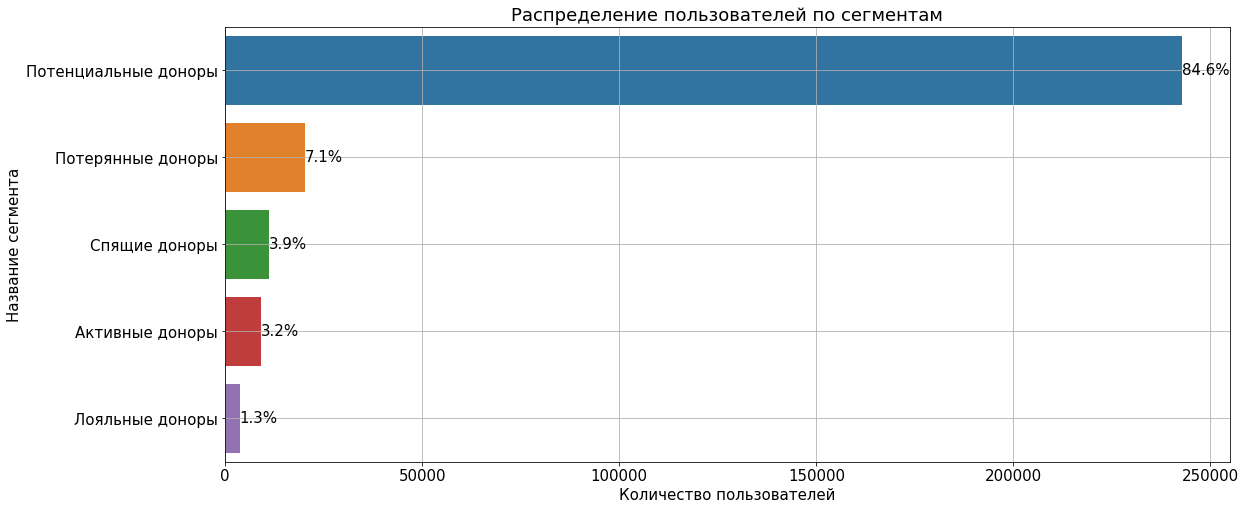

In [36]:
# группировка пользователей по сегментам
segments=(users.groupby('segment', as_index=False).
              agg({'id':'count'}).
              rename(columns={'id':'count_customer'}).
              sort_values('count_customer', ascending=False))

segments['percentage'] = segments['count_customer'] / segments['count_customer'].sum() * 100

# построение графика
plt.rcParams['font.size'] = 15
plt.figure(figsize=(18, 8))

ax = sb.color_palette("turbo", as_cmap=True)
ax = sb.barplot(y='segment', x='count_customer', data=segments)

for i, v in enumerate(segments['count_customer']):
    ax.text(v + 0.5, i, f"{segments['percentage'].iloc[i]:.1f}%", color='black', va='center')
    
ax.set_title('Распределение пользователей по сегментам')
ax.set_xlabel('Количество пользователей') 
ax.set_ylabel('Название сегмента')
ax.grid(True)
plt.show()

<div class="alert"  style="border-radius: 5px; box-shadow: 2px 2px 2px; border: 1px solid ">

В результате сегментации получилось 5 групп пользователей сервиса: `Потенциальные доноры`, `Потерянные доноры`, `Спящие доноры`, `Активные доноры` и `Лояльные доноры`.
    
Самая многочисленная группа `Потенциальные доноры` состоит из 242716 пользователей.
    
Меньше всего доноров в группе `Лояльные доноры` - 3706.

## Исследование сегментов

In [37]:
# Создание нового датафрейма со всей собранной в ходе исследования информацией 
data_full = pd.merge(summary_table, users, on='id')

data_full = (data_full
             .drop(columns=['confirmed_donations_x', '1st_jan_donations', 'ready_whole_blood', 'ready_plasma',
                            'ready_platelets', 'ready_erythrocyte', 'ready_leukocyte', 'ready_marrow'])
            )

data_full.head(5)

,id,last_donation,donated_3_years,donated_1_year,quick_addition,gender,birth_date,region,blood_type,kell_factor,honorary_donor,withdrawal_donation,whole_blood,plasma,platelets,erythrocyte,leukocyte,registration_date,unconfirmed_donations,confirmed_donations_y,donations_before,last_activity,tags,email,phone,login_vk,login_ok,login_twitter,login_yandex,login_google,icon_20,icon_75,icon_100,icon_150,icon_friend,sent_shirt,sent_bangle,taken_bonuses,age,segment
0,300328,NaT,Нет,Нет,0,Не указано,NaT,"Россия, Тверская область, Тверь",Не указано,Не указано,Дата получения не известна,Нет,0,0,0,0,0,2024-08-25,0,0,0,2024-08-25,[None],да,нет,да,нет,нет,нет,нет,нет,нет,нет,нет,нет,нет,нет,0,0,Потенциальные доноры
1,300327,NaT,Нет,Нет,0,Мужской,1971-12-08,Не указано,Не указано,Не указано,Дата получения не известна,Нет,0,0,0,0,0,2024-08-25,0,0,Не указано,NaT,['CardsMobile'],да,да,нет,нет,нет,нет,нет,нет,нет,нет,нет,нет,нет,нет,0,52,Потенциальные доноры
2,300326,NaT,Нет,Нет,0,Не указано,NaT,"Россия, Москва",Не указано,Не указано,Дата получения не известна,Нет,0,0,0,0,0,2024-08-25,0,0,Не указано,2024-08-25,['Referral'],да,нет,нет,нет,нет,нет,нет,нет,нет,нет,нет,нет,нет,нет,0,0,Потенциальные доноры
3,300325,NaT,Нет,Нет,0,Не указано,NaT,Не указано,Не указано,Не указано,Дата получения не известна,Нет,0,0,0,0,0,2024-08-25,0,0,0,2024-08-25,['Recipient'],да,нет,нет,нет,нет,нет,нет,нет,нет,нет,нет,нет,нет,нет,0,0,Потенциальные доноры
4,300324,NaT,Нет,Нет,0,Мужской,1971-10-12,Не указано,Не указано,Не указано,Дата получения не известна,Нет,0,0,0,0,0,2024-08-25,0,0,Не указано,NaT,['CardsMobile'],да,да,нет,нет,нет,нет,нет,нет,нет,нет,нет,нет,нет,нет,0,52,Потенциальные доноры


### По способу авторзации

In [38]:
# создание цикла для формирования и группировки пользователей по сегментам и способам авторизации
authorizations = ['login_vk', 'login_ok', 'login_twitter', 'login_yandex', 'login_google']
final_results = pd.DataFrame()
for socials in authorizations:
    social_logins = (data_full[data_full[socials] == 'да'].groupby(['segment', socials]).
              agg({'id': 'count'}).
              reset_index())
    
    social_logins[socials] = social_logins['id']
    social_logins = social_logins.drop(columns='id')
    
    if final_results.empty:
        final_results = social_logins
    else:
        final_results = pd.merge(final_results, social_logins, on='segment', how='outer')
        final_results = final_results.rename(columns={'id_x':socials, 'id_y':socials, 'id':socials})

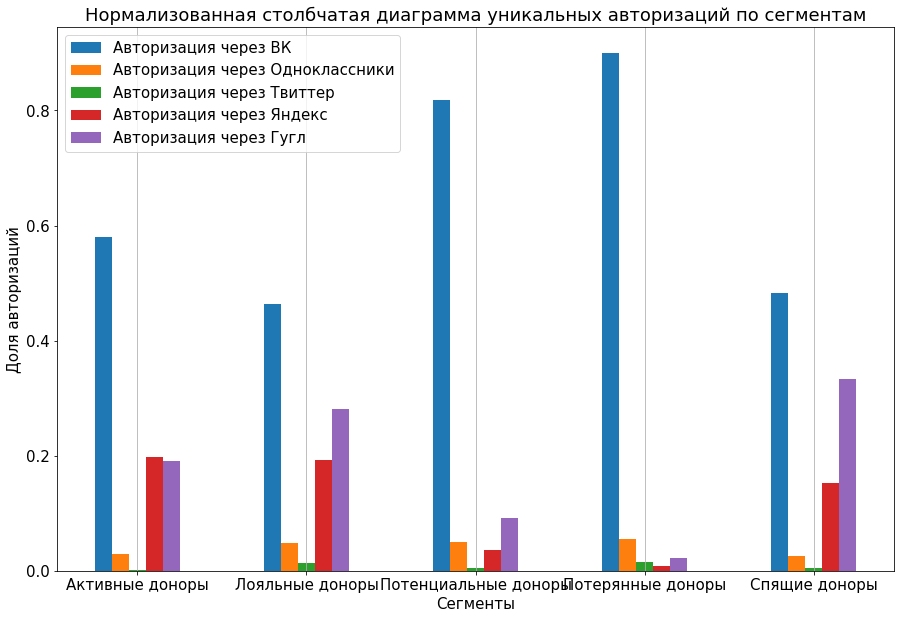

In [39]:
# Нормализация данных
normal_data = np.array([
    final_results['login_vk'],
    final_results['login_ok'],
    final_results['login_twitter'],
    final_results['login_yandex'],
    final_results['login_google']
])

# Сумма по строкам (по сегментам)
data_sums = normal_data.sum(axis=0)

# Нормализованные данные
normalized_data = normal_data / data_sums

# Параметры для группировки
x = np.arange(len(final_results['segment']))
width = 0.1  # Ширина столбцов

# Построение графика
fig, ax = plt.subplots(figsize=(15, 10))
bars1 = ax.bar(x - width*2, normalized_data[0], width, label='Авторизация через ВК')
bars2 = ax.bar(x - width, normalized_data[1], width, label='Авторизация через Одноклассники')
bars3 = ax.bar(x, normalized_data[2], width, label='Авторизация через Твиттер')
bars4 = ax.bar(x + width, normalized_data[3], width, label='Авторизация через Яндекс')
bars5 = ax.bar(x + width*2, normalized_data[4], width, label='Авторизация через Гугл')

ax.set_xlabel('Сегменты')
ax.set_ylabel('Доля авторизаций')
ax.set_title('Нормализованная столбчатая диаграмма уникальных авторизаций по сегментам')
ax.set_xticks(x)
ax.set_xticklabels(final_results['segment'])
ax.legend()
plt.grid(axis='x')

plt.show()

<div class="alert"  style="border-radius: 5px; box-shadow: 2px 2px 2px; border: 1px solid ">

Во всех сегментах `Авторизация через ВК` занимает первое место по количеству уникальных пользователей. Это связано с тем, что сервис DonorSearch изначально был приложением в ВК, а потом уже создал свой сайт.
    
У групп `Потенциальные доноры`, `Лояльные доноры` и `Спящие доноры` на втором месте `Авторизация через Гугл`.
    
Меньше всего авторизаций во всех группах через Твиттер.

### По полу пользователей

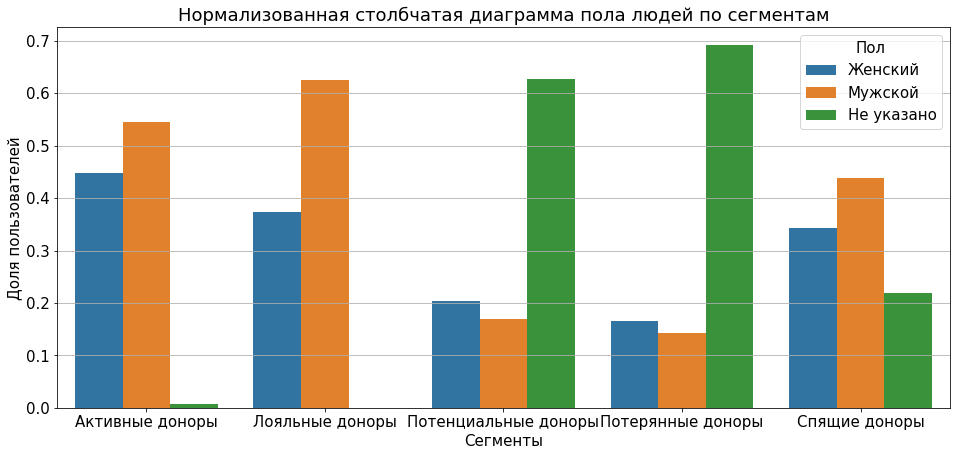

In [40]:
# Группировка и нормализация данных
dfbar_gender = (data_full.groupby(['segment', 'gender'])
                 .agg({'id': 'count'})
                 .reset_index()
                 .groupby('segment')
                 .apply(lambda x: x.assign(percentage=x['id'] / x['id'].sum()))
                 .reset_index(drop=True)
                )

plt.figure(figsize=(16, 7))
sb.barplot(y='percentage', x='segment', hue='gender', data=dfbar_gender)
plt.title('Нормализованная столбчатая диаграмма пола людей по сегментам')
plt.ylabel('Доля пользователей')
plt.xlabel('Сегменты')
plt.grid(axis='y')
plt.legend(title='Пол')
plt.show()

<div class="alert"  style="border-radius: 5px; box-shadow: 2px 2px 2px; border: 1px solid ">

Во всех сегментах, кроме `Потенциальные доноры` и `Потерянные доноры` доля указавших свой пол пользователей больше.
    
Так же стоит заметить, что в `Активные доноры`, `Спящие доноры` и `Лояльные доноры` доминирует мужская аудитория.

### По возрасту

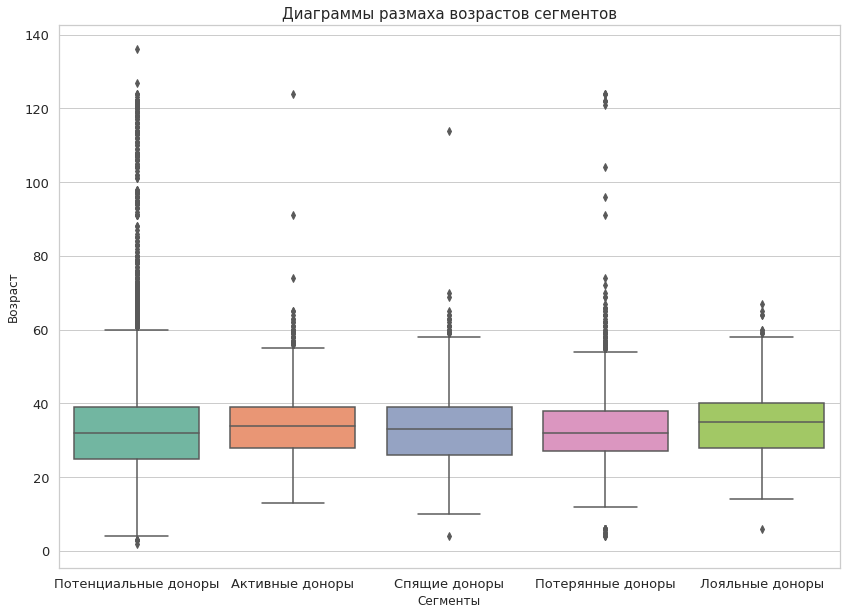

In [41]:
# Фильтрация данных
age_group = data_full[data_full['age'] > 0]

# Настройка стиля графика
sb.set(style="whitegrid")

# Построение boxplot
plt.figure(figsize=(14, 10))
sb.boxplot(x='segment', y='age', data=age_group, palette="Set2")

# Добавление заголовка и меток осей
plt.title('Диаграммы размаха возрастов сегментов', fontsize=15)
plt.xlabel('Сегменты')
plt.ylabel('Возраст')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

<div class="alert"  style="border-radius: 5px; box-shadow: 2px 2px 2px; border: 1px solid ">

Как видно на графике, разница в среднем возрасте сегментов обеспечена выбросами.
    
Возрастные пользователи в основном находятся в `Потенциальные доноры`.

### По отправленным бонусам донору

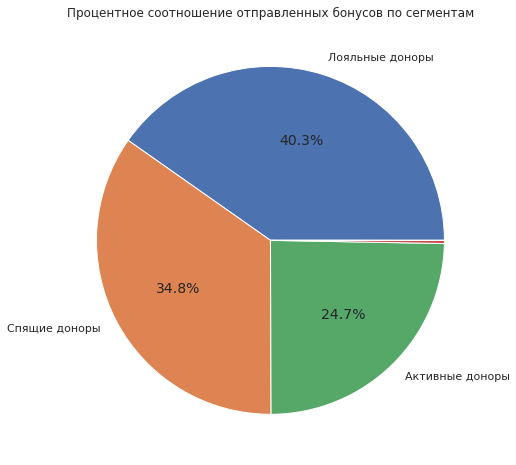

,segment,taken_bonuses
2,Потенциальные доноры,1
3,Потерянные доноры,79
0,Активные доноры,6770
4,Спящие доноры,9559
1,Лояльные доноры,11055


In [42]:
# Фильтрация и группировка данных
bonus_group = data_full.groupby('segment')['taken_bonuses'].sum().reset_index().sort_values('taken_bonuses')

# Группировка и вывод круговой диаграммы соотношения пользователей по группе крови
plt.rcParams.update({'font.size': 14})
bonus_group.groupby('segment')['taken_bonuses'].sum().sort_values(ascending=False).plot(
    kind = 'pie',
    labels=['Лояльные доноры', 'Спящие доноры', 'Активные доноры', '', ''],
    y = 'ratio',
    autopct = lambda p: '{:.1f}%'.format(p) if p >= 2 else '',
    figsize=(12,8),
    ylabel= '',
    title = 'Процентное соотношение отправленных бонусов по сегментам')
plt.show()
bonus_group

<div class="alert"  style="border-radius: 5px; box-shadow: 2px 2px 2px; border: 1px solid ">

Наибольшая доля бонусов была отправлена `Лояльным донорам` - 11055.

Доля бонусов `Потенциальных` и `Потерянных` доноров` ничтожно мала.

<div class="alert"  style="border-radius: 5px; box-shadow: 2px 2px 2px; border: 1px solid ">

Ислледование сегментов показало значительную разницу по всем рассмотренным признакам, что свидетельствует о корректном распределении по группам.

## Выводы

В ходе проекта были проанализированы зарегистрированные пользователи сервиса по увеличению числа доноров «DonorSearch» с помощью датасетов, которые описывают профили пользователей, донации и бонусы. Были определены и исследованы основные признаки разных сегментов.

На этапе предобработки данные были проверены на пропуски, явные дубликаты и соответствие типов данных, привидение к корректному типу столбцов, содержащих даты и необходимых для дальнейших исследований. Обнаружено и удалено 900 строчек-дубликатов из таблицы `donations`, что составило 0.3 % от всего датафрейма. Так же обнаружены и заполнена большая часть пропусков в таблице `user_bonus` с информацией о регионе отправления бонуса.

Дополнительно удалены столбцы, в которых логически дублируется информация и сравнение показало различия в 1.73 %, что незначительно для целей проекта. Добавлен столбец с возрастом пользователей.

При исследовании данных было определено, что:
* 44197 уникальных пользователей из датасета сделали хотя бы 1 подтверждённую донацию;
* Больше половины не указали свой пол;
* 78.5 % зарегистрированных пользователей не указали свою группу крови;
* Самая редкая группа крови в представленных данных - Четвёртая отрицательная `AB(IV) Rh-`, а самая распространённая - Вторая положительная `A(II) Rh+`;
* 93.4 % людей сдавали кровь безвозмездно;
* В этом календарном году больше всего раз сдавали кровь в марте. В среднем за прошедший год (365 дней) было 3550 донации в месяц;
* Больше всех донаций совершил пользователь с уникальным id `235391` - 378;
* Самым частым источником трафика является `[CardsMobile]` - 53 275 регистраций.

Обозначив критерия и условия пользователи были разделены на 5 сегментов: `Потенциальные доноры`, `Потерянные доноры`, `Спящие доноры`, `Активные доноры` и `Лояльные доноры`. Самым многочисленным стал сегмент `Потенциальные доноры` - 242 716 пользователей, не совершивших ни одной донации. А меньше всех оказался самый активный и лояльный сегмент `Лояльные доноры` - 3 706 доноров.

Исследования получившихся сегментов показали значительную разницу по способу авторизации, полу пользователей, среднему возрасту и отправленным бонусам, что свидетельствует о корректной сегментации пользователей сайта НКО "DonorSearch".

**Краткие описания сегментов:**

* Сегмент `Потенциальные доноры`: 
    * Количество уникальных пользователей - 242 716;
    * Средний возраст этого кластера составляет - 33.26; 
    * Гендерный состав - 41 003 мужчин и 49 291 женщин, остальные не указаны;
    * Отправленных бонусов - 1;
    * Топ способа авторизации - `Авторизация через ВК`;

 
* Сегмент `Потерянные доноры`: 
    * Количество уникальных пользователей - 20 269;
    * Средний возраст этого кластера составляет - 33.33; 
    * Гендерный состав - 2 898 мужчин и 3 360 женщин, остальные не указаны;
    * Отправленных бонусов - 79;
    * Топ способа авторизации - `Авторизация через ВК`;
    

* Сегмент `Спящие доноры`: 
    * Количество уникальных пользователей - 11 153;
    * Средний возраст этого кластера составляет - 33.02; 
    * Гендерный состав - 4 883 мужчин и 3 821 женщин, остальные не указаны;
    * Отправленных бонусов - 9 559;
    * Топ способа авторизации - `Авторизация через ВК`;
     
 
* Сегмент `Активные доноры`: 
    * Количество уникальных пользователей - 9 069;
    * Средний возраст этого кластера составляет - 33.66; 
    * Гендерный состав - 4 936 мужчин и 4 063 женщин, остальные не указаны;
    * Отправленных бонусов - 6 770;
    * Топ способа авторизации - `Авторизация через ВК`;
    
    
* Сегмент `Лояльные доноры`: 
    * Количество уникальных пользователей - 3 706;
    * Средний возраст этого кластера составляет - 34.26; 
    * Гендерный состав - 2 320 мужчин и 1 385 женщин, остальные не указаны;
    * Отправленных бонусов - 11 055;
    * Топ способа авторизации - `Авторизация через ВК`;

Презентация: https://disk.yandex.ru/d/LmQJZN5BIAv0IA